In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(url, usecols=[1], engine="python", skipfooter=3)
data = dataset.values.astype("float32")


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

In [5]:
train_size = int(len(data)*0.67)
train, test = data[:train_size], data[train_size:]

In [6]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back),0])
        Y.append(dataset[i+look_back,0])
    return np.array(X), np.array(Y)

In [7]:
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [8]:
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [9]:
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - 19ms/step - loss: 0.0331
Epoch 2/100
92/92 - 0s - 2ms/step - loss: 0.0155
Epoch 3/100
92/92 - 0s - 3ms/step - loss: 0.0120
Epoch 4/100
92/92 - 1s - 6ms/step - loss: 0.0109
Epoch 5/100
92/92 - 0s - 2ms/step - loss: 0.0101
Epoch 6/100
92/92 - 0s - 3ms/step - loss: 0.0091
Epoch 7/100
92/92 - 0s - 3ms/step - loss: 0.0082
Epoch 8/100
92/92 - 0s - 3ms/step - loss: 0.0074
Epoch 9/100
92/92 - 0s - 2ms/step - loss: 0.0064
Epoch 10/100
92/92 - 0s - 2ms/step - loss: 0.0057
Epoch 11/100
92/92 - 0s - 2ms/step - loss: 0.0051
Epoch 12/100
92/92 - 0s - 3ms/step - loss: 0.0044
Epoch 13/100
92/92 - 0s - 2ms/step - loss: 0.0038
Epoch 14/100
92/92 - 0s - 3ms/step - loss: 0.0033
Epoch 15/100
92/92 - 0s - 2ms/step - loss: 0.0029
Epoch 16/100
92/92 - 0s - 2ms/step - loss: 0.0026
Epoch 17/100
92/92 - 0s - 2ms/step - loss: 0.0024
Epoch 18/100
92/92 - 0s - 2ms/step - loss: 0.0022
Epoch 19/100
92/92 - 0s - 3ms/step - loss: 0.0021
Epoch 20/100
92/92 - 0s - 2ms/step - loss: 0.0020
Epoch 21

In [11]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [12]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


In [13]:
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print("Train RMSE:", train_score)
print("Test RMSE:", test_score)


Train RMSE: 23.070650554068827
Test RMSE: 52.11459176490339


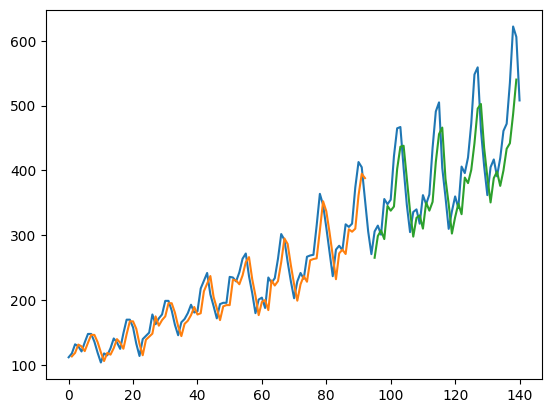

In [14]:
train_plot = np.empty_like(data)
train_plot[:] = np.nan
train_plot[look_back:len(train_predict)+look_back] = train_predict

test_plot = np.empty_like(data)
test_plot[:] = np.nan
test_plot[len(train_predict)+(look_back*2)+1:len(data)-1] = test_predict

plt.plot(scaler.inverse_transform(data))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()
